In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt 
import math
import statistics
import zipfile

In [69]:
df = pd.read_fwf('Fetal2020US_COD.zip',compression='zip', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,A,2202001,9106,1,1,26094,1,201101,NaN,14,...,LNNX,111111111111111111111,11111111,1111,1,111,111111,P95,104.0,1.0
1,A,2202002,20314,1,1,21083,2,102202,NaN,22,...,UPPX,111111111111111111111,11111111,1111,1,111,111111,P95,104.0,1.0
2,A,2202003,10042,1,1,38116,1,101101,NaN,14,...,ANYN,111111111111111111111,11111111,1111,1,111,111111,P011,32.0,1.0
3,A,2202003,17333,1,1,37116,2,101101,NaN,15,...,UNNX,111111111111111111111,11111111,1111,1,111,111111,P95,104.0,1.0
4,A,2202002,12501,1,1,30105,3,101101,1.0,5679,...,LNNX,111111111111111111111,11111111,1111,1,111,111111,P027,48.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41811,A,1202001,13275,1,1,34105,1,101101,NaN,9989,...,UNNX,111110111111111111111,11111111,1101,1,111,111111,NaN,NaN,0.0
41812,A,1202001,12303,1,1,36116,1,101101,NaN,9989,...,UNNX,111110111111111111111,11111111,1101,1,111,111111,NaN,NaN,0.0
41813,A,1202011,12044,1,1,29094,1,101101,NaN,13,...,UNNX,111110111111111111111,11111111,1101,1,111,111111,NaN,NaN,0.0
41814,A,1202010,12165,1,1,33105,1,201101,NaN,12,...,UNNX,111110111111111111111,11111111,1101,1,111,111111,NaN,NaN,0.0


In [70]:
dag = pd.read_csv('Fetal2020US_COD.zip', header=None)
dag

,0
0,A 2202001 09106 1 ...
1,A 2202002 20314 1 ...
2,A 2202003 10042 1 ...
3,A 2202003 17333 1 ...
4,A 2202002 12501 1 ...
...,...
41811,A 1202001 13275 1 ...
41812,A 1202001 12303 1 ...
41813,A 1202011 12044 1 ...
41814,A 1202010 12165 1 ...


In [71]:
dict20 =[
    [86, 87,"Mother’s Single Year of Age"],
    [15, 16, "Delivery Month"],
    [25, 25,"Weekday"],
]

In [72]:
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    intermediate_data={}
    for start, stop, column_name in datadictionary:
        intermediate_data[column_name] = []
    for idx in natalitydata.index:
        for start, stop, column_name in datadictionary:
            intermediate_data[column_name].append(natalitydata.loc[idx][0][start-1:(stop-1+1)])
   #         if idx < 3:
   #              print(idx, start,stop, column_name, natalitydata.loc[idx][0][start-1:(stop-1+1)])
    df = pd.DataFrame()
    for start, stop, column_name in datadictionary:
        print(column_name)
        df[column_name] = pd.Series(intermediate_data[column_name])
    return df

In [73]:
david = parse_natality(dag, dict20)

Mother’s Single Year of Age
Delivery Month
Weekday


In [74]:
david2=david.drop([32311])
david2

,Mother’s Single Year of Age,Delivery Month,Weekday
0,26,01,6
1,21,02,4
2,38,03,2
3,37,03,3
4,30,02,1
...,...,...,...
41811,34,01,5
41812,36,01,3
41813,29,11,4
41814,33,10,5


In [142]:
num = []
for i in range(1,8):
    num.append(day.count(i))
days=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

<BarContainer object of 7 artists>

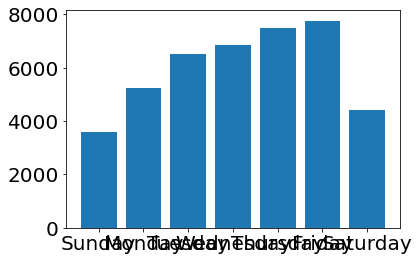

In [143]:
plt.bar(days,num)

(array([3570., 5228.,    0., 6510.,    0., 6862., 7471.,    0., 7756.,
        4418.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

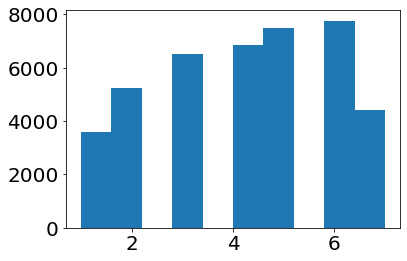

In [110]:
day = []
for i in david2["Weekday"]:
    b=float(i)
    day.append(b)

plt.hist(day)

In [ ]:
plt.xticks([0,1,2,3, 4, 5, 6],['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

Text(0.5, 1.0, 'Spread of fetal deaths per weekday in 2020')

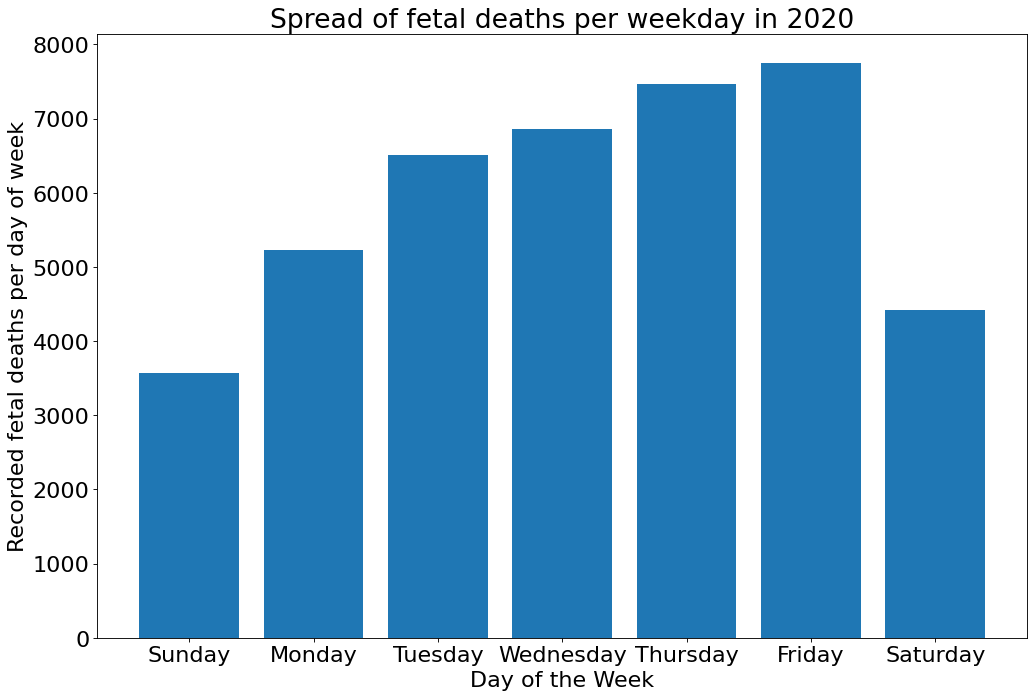

In [145]:
figure(figsize=(15, 10), dpi=80)
plt.bar(days,num)
plt.xticks(fontsize=20)
plt.xlabel("Day of the Week")
plt.ylabel("Recorded fetal deaths per day of week")
plt.title("Spread of fetal deaths per weekday in 2020")

In [75]:
def splog(string):
    a = float(string)
    return(a)

In [158]:
month = []
for i in david2["Delivery Month"]:
    b=int(i)
    month.append(b)

In [100]:
day = []
for i in david2["Weekday"]:
    b=int(i)
    day.append(b)

(array([3982., 3596., 3513., 3296., 3445., 3355., 3537., 3548., 3352.,
        3469., 3250., 3473.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <BarContainer object of 12 artists>)

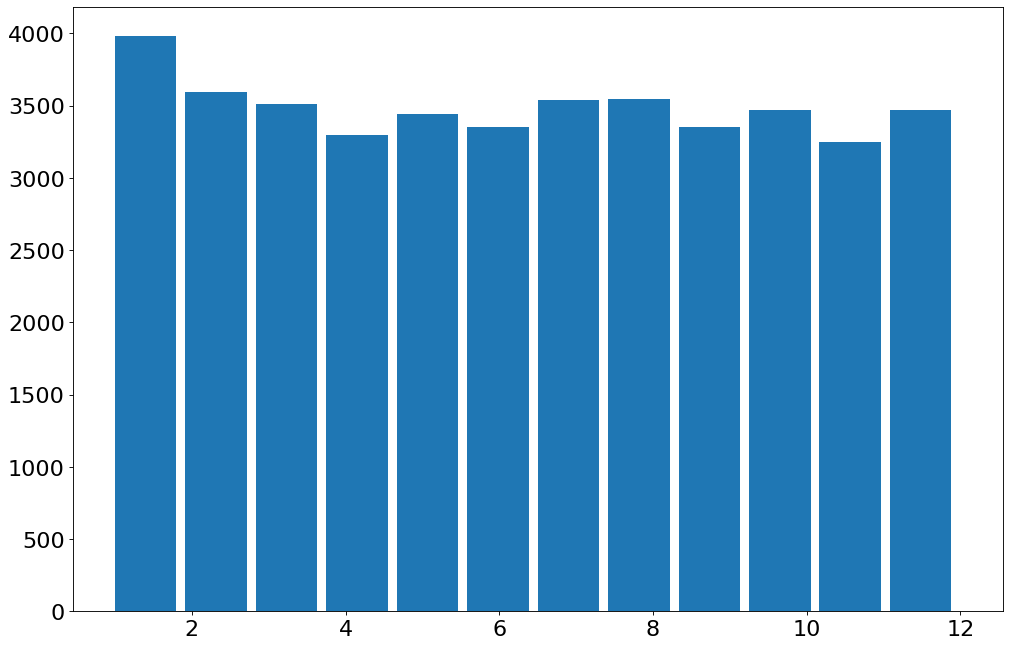

In [91]:
figure(figsize=(15, 10), dpi=80)
plt.hist(month, bins=12, width=0.8)

In [159]:
noogie = []
for i in range(1,13):
    noogie.append(month.count(i))
months=['Jan', "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

/var/folders/zb/cqngm18x18v4wmpfr61z84jc0000gn/T/ipykernel_32565/1937789109.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


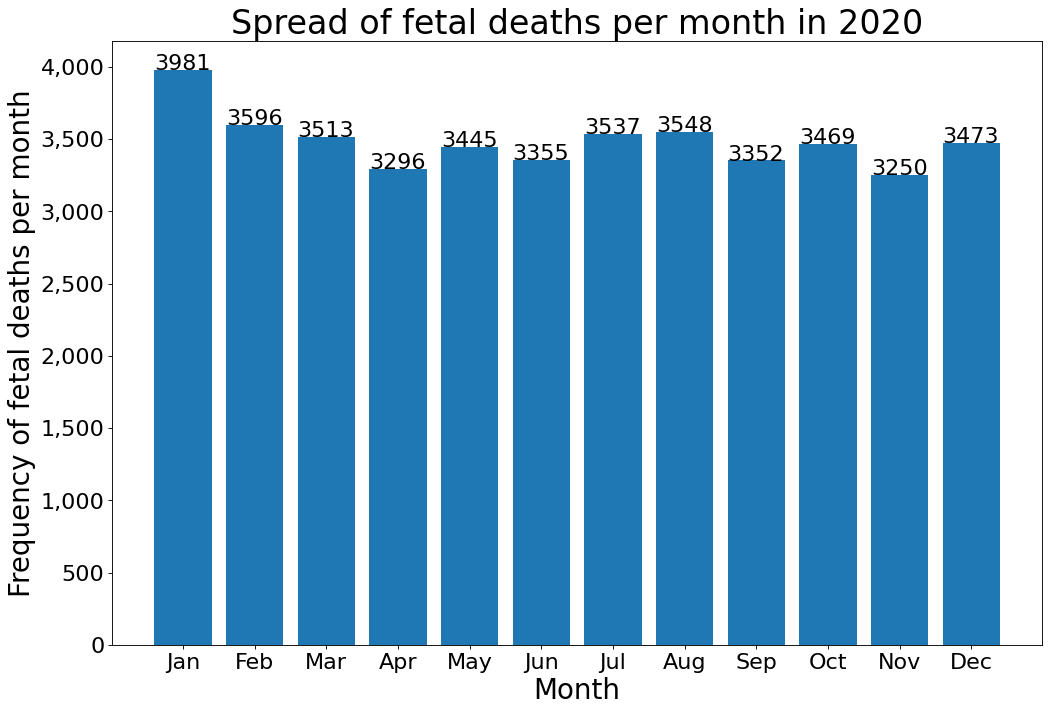

In [186]:
figure(figsize=(15, 10), dpi=80)
plt.bar(months,noogie)
plt.xticks(fontsize=20)
plt.xlabel("Month", size=25)
plt.ylabel("Frequency of fetal deaths per month", size=25)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title("Spread of fetal deaths per month in 2020", size=30)

for i, v in enumerate(noogie):
    plt.text(range(0,12)[i] - 0.4, v + 0.03, str(v))

In [161]:
dog = []
for i in david2["Mother’s Single Year of Age"]:
    b=splog(i)
    dog.append(b)

In [159]:
david["Mother’s Single Year of Age"].value_counts().sum()

41816

In [134]:
a = (david["Mother’s Single Year of Age"][0])
for i in david["Mother’s Single Year of Age"]:
    print(i)

26
21
38
37
30
20
36
30
25
35
28
28
30
32
32
26
28
30
32
17
25
28
19
20
29
24
22
33
27
21
39
22
24
24
27
33
26
24
39
33
25
32
32
39
28
27
15
37
18
32
29
20
22
29
30
21
29
36
23
19
41
22
38
19
29
20
29
29
33
20
23
33
22
30
32
29
20
22
35
24
35
32
21
38
20
26
29
29
19
36
28
40
35
42
24
28
28
21
29
20
32
29
20
38
28
30
29
35
25
28
18
28
35
26
28
35
37
37
30
22
20
30
23
35
35
29
19
27
33
22
26
40
32
26
33
23
34
24
32
25
18
26
25
36
36
25
38
24
28
17
38
18
20
19
26
33
35
21
37
31
25
33
31
24
36
31
29
24
21
45
33
35
33
25
23
32
22
17
21
18
19
33
37
37
20
21
27
31
28
35
27
18
25
30
32
32
31
24
41
33
27
28
21
19
24
27
25
24
33
26
27
20
22
24
21
26
31
38
26
33
21
28
27
28
19
21
35
42
31
23
33
17
21
29
32
25
22
42
28
30
35
19
27
26
24
19
30
18
30
36
27
35
24
31
34
21
20
32
39
38
38
24
28
33
32
29
27
34
34
29
34
19
28
33
31
41
38
34
25
28
27
20
27
28
29
31
32
24
25
31
23
37
37
17
26
20
16
35
34
19
19
26
31
21
35
27
36
31
34
20
36
22
27
26
25
20
25
31
23
18
30
21
19
32
41
38
26
40
29
20
22
38
35
2

33
32
22
29
25
22
34
24
40
32
33
22
30
18
32
31
25
36
31
19
30
32
17
29
30
36
26
37
36
36
32
37
42
25
33
32
32
19
37
33
35
37
30
36
29
26
31
30
38
28
37
20
43
37
30
25
24
27
30
24
35
29
28
21
34
33
25
36
16
26
21
38
19
28
30
28
25
26
24
33
21
25
31
22
33
27
29
18
35
22
33
29
19
28
24
24
20
38
32
21
28
32
33
34
37
27
29
39
30
24
33
20
42
37
23
33
30
29
36
34
30
35
22
29
21
26
23
28
33
41
38
22
42
35
37
34
31
21
31
41
25
23
33
29
41
27
28
23
37
17
30
19
27
36
26
33
35
30
35
41
34
30
37
30
31
38
24
30
32
36
42
25
16
19
41
23
30
24
39
32
22
21
29
32
34
33
43
29
28
35
20
22
35
30
22
20
23
28
31
25
29
28
28
27
19
36
36
37
32
20
38
23
43
25
42
35
23
29
22
38
26
35
17
28
23
36
37
21
31
26
27
43
38
34
20
21
19
21
27
24
36
24
28
32
22
29
27
39
24
22
22
35
28
25
23
31
35
41
20
25
18
31
18
28
26
26
43
26
26
29
30
37
35
28
29
40
37
47
30
34
21
31
19
26
29
21
38
25
31
31
31
30
23
34
36
41
32
28
32
32
25
21
17
27
25
27
28
34
38
25
30
37
38
32
33
35
29
30
35
30
32
29
41
34
36
21
21
27
30
27
40
32
45
3

38
32
23
26
32
23
40
35
29
30
36
39
20
39
36
36
40
25
28
25
37
24
31
22
44
29
25
31
35
32
27
36
45
24
25
32
30
21
35
39
25
24
16
30
27
26
20
23
24
16
26
34
40
35
32
23
34
22
25
22
25
21
30
29
41
30
28
42
35
35
30
30
30
21
39
31
37
30
25
19
43
29
28
23
33
37
34
25
31
29
37
39
23
27
40
19
31
24
24
35
32
38
29
37
37
31
31
38
27
17
40
24
33
38
39
18
26
35
27
28
34
40
42
42
24
22
27
34
29
28
35
26
30
38
37
36
41
21
36
39
22
17
25
39
20
24
24
34
29
38
34
18
24
26
23
26
34
21
34
27
29
28
18
30
34
38
31
28
29
36
18
32
41
25
28
23
27
22
38
19
37
31
30
18
25
28
29
29
32
30
21
29
21
27
19
41
26
20
29
30
42
19
42
20
44
33
34
19
35
35
40
18
27
37
27
37
37
40
23
45
28
19
27
26
40
25
32
26
33
19
27
33
23
28
37
27
31
30
28
34
33
35
45
36
35
37
35
41
30
24
23
34
30
32
24
36
39
29
34
23
25
39
20
31
26
21
44
36
31
35
26
30
39
25
27
24
32
34
25
29
25
30
26
31
21
34
28
28
30
40
34
34
34
31
27
40
37
31
40
35
23
27
30
28
24
30
33
35
32
34
23
31
37
26
39
37
35
32
31
35
29
31
29
25
27
27
32
33
31
31
37
30
31
3

27
30
28
34
21
28
39
26
30
30
33
45
32
16
26
40
25
30
30
29
39
38
31
31
36
33
38
32
30
27
24
31
22
20
23
28
29
25
26
37
38
26
34
28
34
31
40
27
31
33
36
32
26
34
41
34
25
24
30
20
29
35
18
24
30
30
30
30
28
36
38
33
28
18
32
35
30
31
27
35
32
22
31
28
36
26
27
24
22
23
41
36
23
24
35
32
37
29
22
21
36
19
21
20
26
38
36
36
20
18
31
29
21
18
36
37
29
29
35
29
32
28
24
43
28
25
32
28
32
32
32
26
30
39
38
24
30
20
27
35
40
40
21
32
19
30
29
39
28
18
31
29
28
17
25
32
29
46
28
36
26
19
18
20
42
20
28
26
17
21
22
39
25
26
23
19
20
34
38
35
20
21
42
42
26
28
20
27
25
36
26
21
21
41
22
17
23
36
23
36
31
27
36
33
37
28
25
34
33
33
22
20
32
27
31
26
25
31
31
35
32
33
22
20
27
28
21
36
38
39
23
30
25
31
33
39
37
31
34
32
44
34
33
35
36
23
26
18
29
27
25
27
41
25
22
26
36
28
36
42
24
33
25
29
26
40
33
22
20
30
25
35
29
27
28
35
22
33
35
25
34
39
33
36
30
30
43
24
30
18
30
37
26
37
22
20
31
39
29
24
31
32
20
39
17
37
17
31
33
34
38
23
40
33
32
40
25
21
33
23
40
33
32
26
26
18
30
21
41
27
32
30
26
2

36
31
30
23
26
42
34
35
24
21
29
35
42
22
22
32
19
25
35
25
28
32
19
30
25
30
16
38
31
43
25
29
22
27
33
37
31
30
26
38
36
22
31
25
28
31
29
32
33
25
26
19
41
33
27
45
28
19
33
39
31
23
34
32
40
37
41
30
38
22
20
21
44
29
25
22
29
23
30
28
31
30
26
24
23
23
30
22
20
29
28
33
23
27
38
21
38
27
26
33
33
28
19
43
24
35
32
23
34
29
31
42
23
37
34
31
23
29
24
21
29
18
27
29
30
36
37
36
38
30
23
31
33
32
28
33
37
34
25
33
40
36
41
32
20
21
40
32
35
34
31
26
41
24
26
39
29
28
30
27
36
21
41
28
42
24
29
27
25
33
23
36
24
22
31
39
31
26
24
25
35
33
32
29
32
32
30
31
25
17
34
36
21
26
26
35
26
28
20
29
23
27
26
36
28
34
39
23
28
21
41
36
23
23
30
44
35
31
32
28
37
37
36
42
39
32
40
32
41
29
31
36
23
29
30
37
36
29
31
33
21
39
20
33
33
31
31
35
36
34
19
21
20
17
30
34
34
28
40
29
38
28
38
32
30
27
39
35
27
17
28
36
36
28
33
37
33
25
30
30
34
29
34
39
18
36
32
21
33
32
47
41
44
37
34
22
20
36
27
20
29
37
33
36
32
27
40
32
30
34
39
38
37
22
29
31
28
36
36
31
26
22
32
38
42
38
32
29
36
29
30
24
39
3

38
38
31
34
30
31
24
25
21
21
28
24
25
23
31
20
31
20
37
34
27
28
28
21
31
25
35
39
26
29
26
21
36
21
23
30
23
30
21
27
31
35
29
33
21
32
33
33
21
20
31
29
40
23
34
21
28
27
31
28
18
28
31
15
38
19
25
32
24
32
26
35
28
27
30
31
20
30
31
21
32
41
23
28
26
22
36
27
21
21
38
18
27
28
26
27
19
35
29
31
26
39
19
36
33
28
26
29
23
20
20
29
27
27
20
37
33
28
29
35
40
20
30
18
35
30
24
29
34
35
33
28
29
32
35
33
24
23
23
27
28
32
23
43
27
19
25
20
46
36
29
26
22
32
18
32
28
39
25
34
32
29
26
33
32
26
25
30
35
42
30
19
36
29
36
37
26
36
27
31
36
36
21
40
28
25
24
26
29
28
34
20
18
20
36
20
16
30
32
21
21
27
20
34
28
29
37
26
39
36
37
33
24
26
26
42
36
36
37
24
38
42
27
26
25
34
28
19
26
29
22
32
36
28
28
24
36
25
29
22
23
29
19
29
28
25
30
26
29
23
35
20
33
34
36
30
19
39
26
36
27
28
33
29
35
28
32
37
24
31
26
31
29
32
28
24
28
38
39
27
28
36
34
16
32
21
23
30
32
25
34
41
35
31
34
33
31
34
41
39
29
27
39
30
23
31
29
44
29
26
34
33
34
27
20
38
19
17
33
33
22
25
30
26
29
19
25
34
28
17
31
27
24
2

24
25
34
28
24
26
22
20
33
23
25
24
34
22
42
27
33
30
21
45
28
29
23
20
27
27
33
22
27
34
34
23
20
22
29
35
26
41
24
28
27
23
35
30
23
28
20
19
21
16
23
27
32
23
35
37
23
26
21
42
25
20
29
35
21
29
24
16
22
21
24
31
16
32
22
26
31
24
37
27
19
22
30
17
19
19
38
26
27
31
29
19
21
31
24
26
31
41
23
33
23
26
20
32
28
30
21
35
26
24
15
30
37
17
19
28
30
35
25
33
33
25
35
26
24
24
33
26
22
30
19
28
27
28
33
20
15
32
34
30
32
27
23
26
21
31
27
18
22
29
25
22
29
35
34
33
23
21
40
30
26
22
31
31
14
38
24
35
27
17
17
26
27
29
33
34
21
36
16
16
32
31
20
30
17
34
24
24
26
23
32
19
41
21
26
31
21
33
20
26
21
18
18
21
27
27
21
34
23
35
23
42
30
20
22
28
38
38
27
26
31
24
27
26
27
24
34
27
41
26
32
30
34
34
36
25
27
31
38
32
28
27
38
27
32
24
30
30
30
19
26
31
21
29
27
25
38
33
33
22
26
30
13
32
28
20
37
27
23
36
31
21
27
28
32
16
24
20
28
31
25
35
29
38
31
36
24
42
27
26
21
32
27
34
24
26
31
33
18
25
38
38
21
28
35
20
32
37
34
36
34
24
16
22
27
26
24
20
25
31
23
38
21
21
35
27
39
25
41
25
35
20
21
1

30
36
30
27
38
31
39
32
37
32
39
29
42
30
31
38
32
37
33
35
35
29
34
43
20
34
20
45
34
36
30
31
39
40
32
36
41
35
39
37
29
17
44
44
37
42
31
33
20
29
32
43
31
34
28
29
40
40
35
32
26
26
30
26
30
27
37
23
18
33
41
29
37
26
33
30
31
33
30
37
27
39
34
39
43
28
23
31
28
33
26
43
35
27
32
31
26
35
44
25
31
22
38
28
27
32
45
31
30
33
32
42
38
43
41
36
29
37
32
35
31
30
43
15
33
36
28
32
34
33
28
41
37
21
35
28
24
22
34
22
37
28
18
36
36
29
35
32
39
23
32
31
28
29
27
32
30
33
29
24
34
27
38
36
28
28
28
34
38
36
33
29
33
34
32
35
34
28
37
28
39
26
34
34
35
41
29
29
39
28
21
34
34
31
37
29
35
39
29
26
29
30
27
29
36
38
23
37
36
31
29
29
30
44
20
21
40
40
28
32
29
43
36
27
28
30
20
28
27
42
31
37
43
19
46
33
30
38
39
28
32
31
33
43
17
28
32
34
37
24
29
36
34
33
29
34
34
40
41
27
30
41
39
39
33
36
22
22
31
30
30
24
34
15
30
31
17
36
27
29
36
28
29
30
24
34
27
37
31
25
47
22
32
30
24
18
18
30
36
36
18
31
36
26
23
26
30
40
32
26
37
21
34
34
32
34
19
26
38
40
41
37
36
31
34
29
36
45
43
29
42
29
42
3

28
28
33
28
24
23
28
26
40
31
44
25
31
25
23
25
18
31
38
26
32
22
32
32
20
29
40
25
29
30
40
31
34
23
25
25
20
32
32
19
20
19
29
41
31
30
41
34
29
24
33
24
29
34
24
16
27
35
32
21
30
23
28
28
27
26
24
33
31
44
27
31
21
30
31
22
33
33
20
36
34
34
34
27
19
35
26
37
42
32
28
30
31
36
25
37
25
20
23
32
43
20
25
42
28
19
22
24
30
20
23
39
33
41
34
29
18
24
26
28
20
36
21
22
24
26
37
28
32
27
30
39
29
26
32
38
28
28
21
26
29
28
34
19
22
26
22
34
21
34
30
27
38
32
26
38
25
24
20
30
26
28
35
28
30
36
36
31
27
39
26
32
20
23
24
28
25
25
21
24
21
23
26
31
38
29
30
18
37
36
19
22
29
29
34
23
33
38
18
30
37
17
32
25
30
20
22
39
22
42
28
24
37
19
31
30
30
36
31
32
36
31
27
32
37
22
24
28
24
46
37
31
22
23
20
39
35
23
27
27
28
27
27
22
28
35
24
20
34
21
36
35
27
39
29
22
33
37
42
18
25
35
20
41
35
35
25
35
39
26
39
38
36
29
39
34
21
36
19
27
20
19
36
24
30
33
43
27
30
45
36
20
23
20
32
30
36
36
39
29
25
37
35
22
27
30
37
36
40
16
32
28
41
19
37
29
36
25
25
33
15
30
20
29
31
19
19
20
39
15
26
19
20
2

32
24
28
29
28
27
37
29
26
33
36
25
37
41
18
20
34
21
32
32
36
20
18
32
25
28
27
27
30
32
34
29
29
20
38
23
24
36
37
29
25
27
24
24
35
19
24
41
42
34
25
26
36
30
18
27
17
25
35
37
23
34
18
28
34
32
30
32
20
38
44
35
29
31
29
37
20
22
26
30
32
27
35
26
24
23
35
37
39
22
35
23
18
33
25
33
29
24
25
30
24
29
38
34
35
36
28
23
34
22
18
22
22
28
28
21
32
29
28
22
20
35
31
33
39
29
26
24
31
37
35
37
29
29
28
27
28
28
34
36
39
20
41
32
36
26
32
24
34
30
29
30
37
32
31
31
23
26
41
35
33
37
23
22
27
35
21
29
33
30
37
24
25
29
37
36
31
28
28
37
28
38
28
26
33
21
31
38
31
18
39
42
29
29
39
32
28
24
39
23
31
30
32
25
27
31
20
18
18
26
30
38
17
28
36
27
23
24
29
32
35
31
24
49
33
27
28
35
33
24
26
32
20
24
32
38
33
22
35
25
32
30
30
32
29
24
23
27
30
29
36
27
36
24
27
34
31
27
34
17
21
36
25
42
41
33
36
27
35
42
26
33
23
27
36
34
32
33
21
40
29
34
28
21
35
22
31
29
29
25
25
35
35
33
30
27
39
36
36
34
17
34
38
35
27
43
37
30
36
31
24
26
32
26
41
37
35
42
28
22
18
32
34
47
42
30
24
38
40
18
25
31
17
2

28
37
46
35
26
27
21
30
36
45
24
35
33
33
26
23
26
24
18
31
36
32
34
29
25
38
41
18
23
36
25
34
36
38
34
38
39
37
30
37
32
31
27
33
24
28
33
29
31
34
41
35
33
33
35
27
34
28
19
26
34
29
35
36
34
37
36
27
30
27
41
27
39
42
32
29
35
31
19
33
30
38
30
35
39
44
32
45
30
33
33
29
37
33
29
39
36
33
31
40
29
29
32
43
32
36
27
31
35
30
20
23
28
34
37
34
22
39
33
30
34
23
33
35
35
32
38
29
28
31
26
25
34
38
36
30
39
33
36
34
16
40
38
35
36
33
39
37
26
42
36
37
35
40
34
30
35
50
33
40
35
41
24
30
23
39
33
45
31
25
34
27
40
25
27
27
32
27
30
35
40
22
35
33
28
29
41
36
21
29
30
23
20
40
24
38
37
28
34
33
15
35
29
20
27
40
25
37
39
31
30
32
30
38
22
48
25
32
41
26
30
27
32
24
33
31
25
42
34
34
29
19
37
28
37
26
21
41
23
36
31
40
23
29
22
32
39
38
28
27
21
35
35
28
33
37
26
34
26
25
35
20
30
38
36
27
32
28
21
28
28
31
37
33
44
29
25
36
35
18
38
34
39
33
19
41
26
32
27
41
22
35
20
25
36
31
36
32
37
31
30
25
37
21
26
23
36
34
38
36
43
38
41
34
34
31
29
38
39
36
34
40
30
34
36
35
39
30
30
37
34
36
38
2

28
36
33
33
29
31
34
42
26
27
35
30
26
21
38
33
22
34
30
33
41
24
40
32
38
29
29
31
20
34
38
36
27
29
30
31
38
43
34
36
19
30
23
33
32
34
25
32
30
29
24
32
40
36
23
26
28
34
40
32
26
42
28
29
34
33
31
20
36
18
36
44
41
34
29
23
39
32
34
48
32
32
31
27
34
43
29
34
40
36
31
43
21
32
35
20
29
22
37
27
32
31
31
35
25
35
41
32
22
41
32
34
30
43
29
36
27
38
29
34
33
31
35
31
20
33
30
31
33
35
26
29
24
31
20
36
34
34
29
35
22
39
34
37
38
40
37
28
23
35
36
42
36
37
34
35
35
35
42
41
31
36
18
35
31
42
32
35
33
37
33
25
35
24
40
34
27
30
38
29
26
27
26
38
24
40
34
42
22
26
30
38
40
41
30
38
42
38
35
30
41
32
36
24
41
23
35
32
30
34
40
25
41
25
32
34
43
37
35
41
39
28
35
31
36
28
31
24
32
36
41
37
28
28
15
36
30
25
37
22
28
23
34
22
30
20
23
33
23
21
29
20
40
22
36
28
35
27
37
24
36
33
42
42
34
36
36
32
28
40
27
28
32
31
36
35
21
40
28
27
22
37
29
23
33
27
32
35
31
35
30
33
39
32
39
25
40
33
27
28
32
41
39
23
44
28
38
24
25
34
36
39
31
33
21
34
33
43
39
27
42
35
27
21
42
26
36
43
32
41
32
37
42
3

29
36
26
36
31
29
25
41
40
32
32
29
37
27
25
22
25
19
38
32
25
20
36
28
26
30
31
34
32
33
41
35
22
29
38
35
37
33
34
19
30
18
32
46
30
31
22
33
19
31
33
35
33
28
32
24
26
36
43
47
36
35
35
33
35
31
32
32
33
30
21
31
27
26
38
19
25
28
24
32
25
25
29
23
42
25
35
27
35
22
35
29
38
21
21
26
27
37
34
30
37
38
41
31
29
36
34
31
30
20
41
42
33
38
40
42
24
26
44
43
40
28
24
31
30
24
30
28
20
36
20
32
21
26
26
36
25
37
39
25
25
28
21
42
34
33
34
41
41
38
28
21
42
21
20
42
18
34
20
23
28
32
27
21
31
29
27
30
24
37
27
21
16
36
38
23
37
43
21
25
38
36
26
40
35
37
42
34
24
32
29
39
27
37
37
31
33
42
39
33
21
37
22
34
41
25
42
29
32
41
35
35
28
36
40
39
35
42
22
38
33
21
38
39
24
21
20
28
26
18
31
45
38
40
40
28
36
29
34
34
35
42
40
37
24
35
28
31
36
26
17
40
22
34
32
29
37
36
31
46
20
28
42
27
30
29
33
28
31
42
31
28
23
31
36
35
30
28
24
24
34
36
29
37
39
42
33
41
41
32
34
34
32
31
39
25
30
30
36
32
25
38
26
37
40
33
37
25
37
39
32
24
23
39
38
23
35
30
32
42
35
32
41
30
34
42
29
30
28
31
35
32
21
3

AttributeError: 'str' object has no attribute 'type'

In [2]:
rock = pd.read_csv("cneos_fireball_data.csv")

In [3]:
rock

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2022-09-15 02:49:02,22.7N,97.6E,31.5,NaN,NaN,NaN,NaN,2.700000e+10,0.095
1,2022-09-14 23:31:15,40.8N,63.4E,35.8,17.4,-13.9,-4.3,9.5,3.200000e+10,0.110
2,2022-09-04 03:54:55,20.0N,165.9E,14.0,21.9,18.4,-11.4,-3.5,2.400000e+10,0.086
3,2022-08-21 16:35:49,6.3S,51.5E,37.0,NaN,NaN,NaN,NaN,2.100000e+10,0.076
4,2022-08-14 07:39:18,35.0S,78.4E,55.5,NaN,NaN,NaN,NaN,4.680000e+11,1.200
...,...,...,...,...,...,...,...,...,...,...
927,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
928,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
929,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
930,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


In [8]:
rock.dtypes

Peak Brightness Date/Time (UT)          object
Latitude (deg.)                         object
Longitude (deg.)                        object
Altitude (km)                          float64
Velocity (km/s)                        float64
vx                                     float64
vy                                     float64
vz                                     float64
Total Radiated Energy (J)              float64
Calculated Total Impact Energy (kt)    float64
dtype: object

In [13]:
lock = rock.rename(columns={"Peak Brightness Date/Time (UT)": "Peak.Brightness.Date.Time", "Latitude (deg.)": "Latitude", "Longitude (deg.)": "Longitude", "Altitude (km)": "Altitude", "Velocity (km/s)": "Velocity", "Total Radiated Energy (J)": "Total.Radiated.Energy", "Calculated Total Impact Energy (kt)": "Calculated.Total.Impact.Energy", "vx": "vx", "vy": "vy", "vz": "vz"})
lock

,Peak.Brightness.Date.Time,Latitude,Longitude,Altitude,Velocity,vx,vy,vz,Total.Radiated.Energy,Calculated.Total.Impact.Energy
0,2022-09-15 02:49:02,22.7N,97.6E,31.5,NaN,NaN,NaN,NaN,2.700000e+10,0.095
1,2022-09-14 23:31:15,40.8N,63.4E,35.8,17.4,-13.9,-4.3,9.5,3.200000e+10,0.110
2,2022-09-04 03:54:55,20.0N,165.9E,14.0,21.9,18.4,-11.4,-3.5,2.400000e+10,0.086
3,2022-08-21 16:35:49,6.3S,51.5E,37.0,NaN,NaN,NaN,NaN,2.100000e+10,0.076
4,2022-08-14 07:39:18,35.0S,78.4E,55.5,NaN,NaN,NaN,NaN,4.680000e+11,1.200
...,...,...,...,...,...,...,...,...,...,...
927,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
928,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
929,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
930,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


In [14]:
a = lock["Longitude"]
a

0       97.6E
1       63.4E
2      165.9E
3       51.5E
4       78.4E
        ...  
927     78.3E
928    100.9W
929      6.3E
930    142.8E
931    124.3E
Name: Longitude, Length: 932, dtype: object

In [5]:
b = a.dropna
b

<bound method Series.dropna of 0       97.6E
1       63.4E
2      165.9E
3       51.5E
4       78.4E
        ...  
927     78.3E
928    100.9W
929      6.3E
930    142.8E
931    124.3E
Name: Longitude (deg.), Length: 932, dtype: object>

In [30]:
for i in a:
    if i.isna() == "True":
        print(i)

AttributeError: 'str' object has no attribute 'isna'

In [17]:
def splog(string):
    mag=string[:-1]
    direction = string[-1]
    return(mag, direction)

In [15]:
clean = []
for i in a:
    if (pd.isnull(i) == False):
        clean.append(i)
        
len(clean)

742

In [18]:
log = []
for i in clean:
    log.append(splog(i))

calcs = []
for i in log:
    if i[1] == "E":
        a = float(i[0])
        calcs.append(a*1)
    elif i[1] == "W":
        b = float(i[0])
        calcs.append(b*-1)

In [19]:
print(min(calcs),max(calcs), statistics.stdev(calcs),statistics.mean(calcs))

-179.7 180.0 104.00720248935735 3.775202156334232


In [20]:
calcs

[97.6,
 63.4,
 165.9,
 51.5,
 78.4,
 -86.9,
 -2.9,
 76.6,
 -20.5,
 -59.6,
 130.1,
 175.0,
 -12.9,
 164.7,
 -39.1,
 -127.1,
 -30.4,
 -68.9,
 57.8,
 -64.3,
 -171.4,
 74.3,
 -20.6,
 -9.1,
 -99.5,
 45.9,
 -38.9,
 56.4,
 11.4,
 142.2,
 -38.0,
 -73.9,
 -160.2,
 -152.6,
 115.0,
 -29.6,
 60.3,
 172.6,
 113.5,
 119.1,
 -7.7,
 -138.7,
 51.4,
 -140.4,
 154.3,
 -148.0,
 -111.8,
 90.1,
 98.4,
 -164.2,
 -55.3,
 -171.2,
 141.0,
 -43.4,
 -79.1,
 106.7,
 90.4,
 141.1,
 -64.1,
 -92.8,
 80.1,
 115.2,
 -51.3,
 -47.6,
 95.5,
 -158.2,
 -54.7,
 96.2,
 135.1,
 -81.0,
 16.8,
 160.4,
 -71.9,
 -133.5,
 -150.2,
 -93.9,
 93.9,
 -135.8,
 -169.7,
 133.5,
 -34.2,
 -103.8,
 -11.2,
 74.0,
 41.7,
 77.2,
 174.2,
 -44.2,
 -131.0,
 -109.4,
 -49.8,
 -45.6,
 23.5,
 -67.9,
 90.8,
 15.1,
 -96.0,
 76.7,
 1.5,
 -35.8,
 34.3,
 -66.0,
 -116.4,
 -125.2,
 -17.5,
 -147.6,
 161.7,
 -37.7,
 -52.2,
 -31.7,
 25.7,
 -143.3,
 -76.0,
 122.9,
 -107.2,
 -28.4,
 -33.5,
 126.9,
 9.2,
 -47.8,
 -130.4,
 -92.9,
 7.0,
 -147.6,
 -129.5,
 168.7,
 -66

In [21]:
import statistics
print(statistics.median(calcs))

3.9499999999999997


(array([-150, -100,  -50,    0,   50,  100,  150]),
 [Text(-150, 0, '150°W'),
  Text(-100, 0, '100°W'),
  Text(-50, 0, '50°W'),
  Text(0, 0, '0°E'),
  Text(50, 0, '50°E'),
  Text(100, 0, '100°E'),
  Text(150, 0, '150°E')])

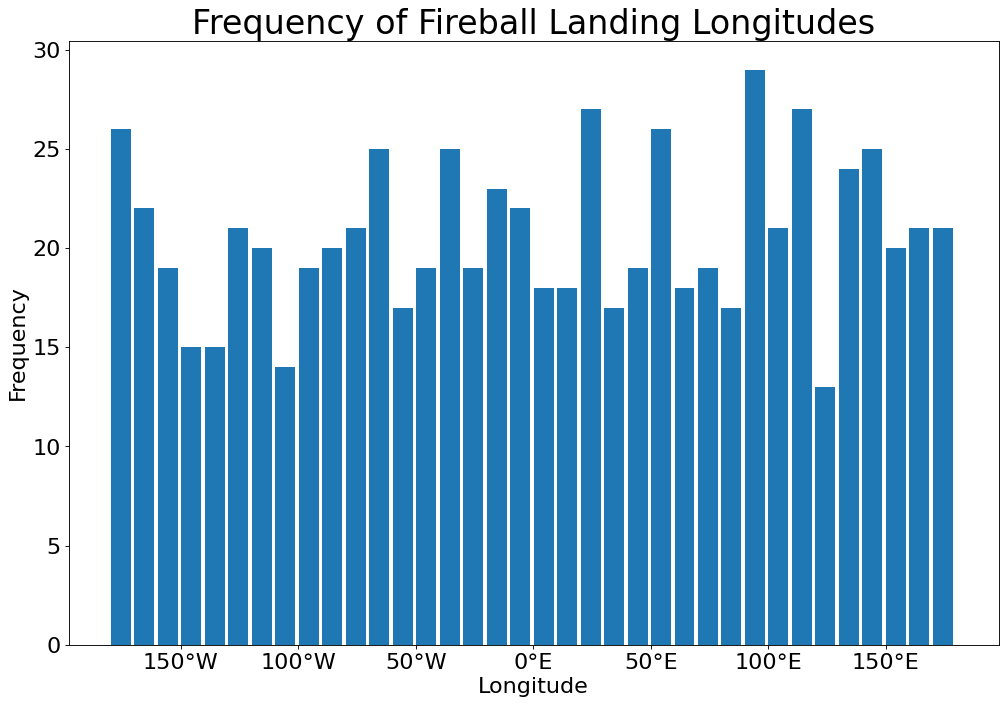

In [25]:
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)
plt.hist(calcs, bins=36, width=8.5)
plt.xlabel("Longitude", size=20)
plt.ylabel("Frequency", size=20)
plt.title("Frequency of Fireball Landing Longitudes", fontsize=30)
plt.rcParams['font.size'] = '20'
plt.xticks([-150,-100,-50,0, 50, 100, 150],['150°W','100°W','50°W','0°E','50°E','100°E','150°E'])
plt.xticks(fontsize=20)

In [44]:
a[49]

nan

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(-100.0, 0, '−100'),
  Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500')])

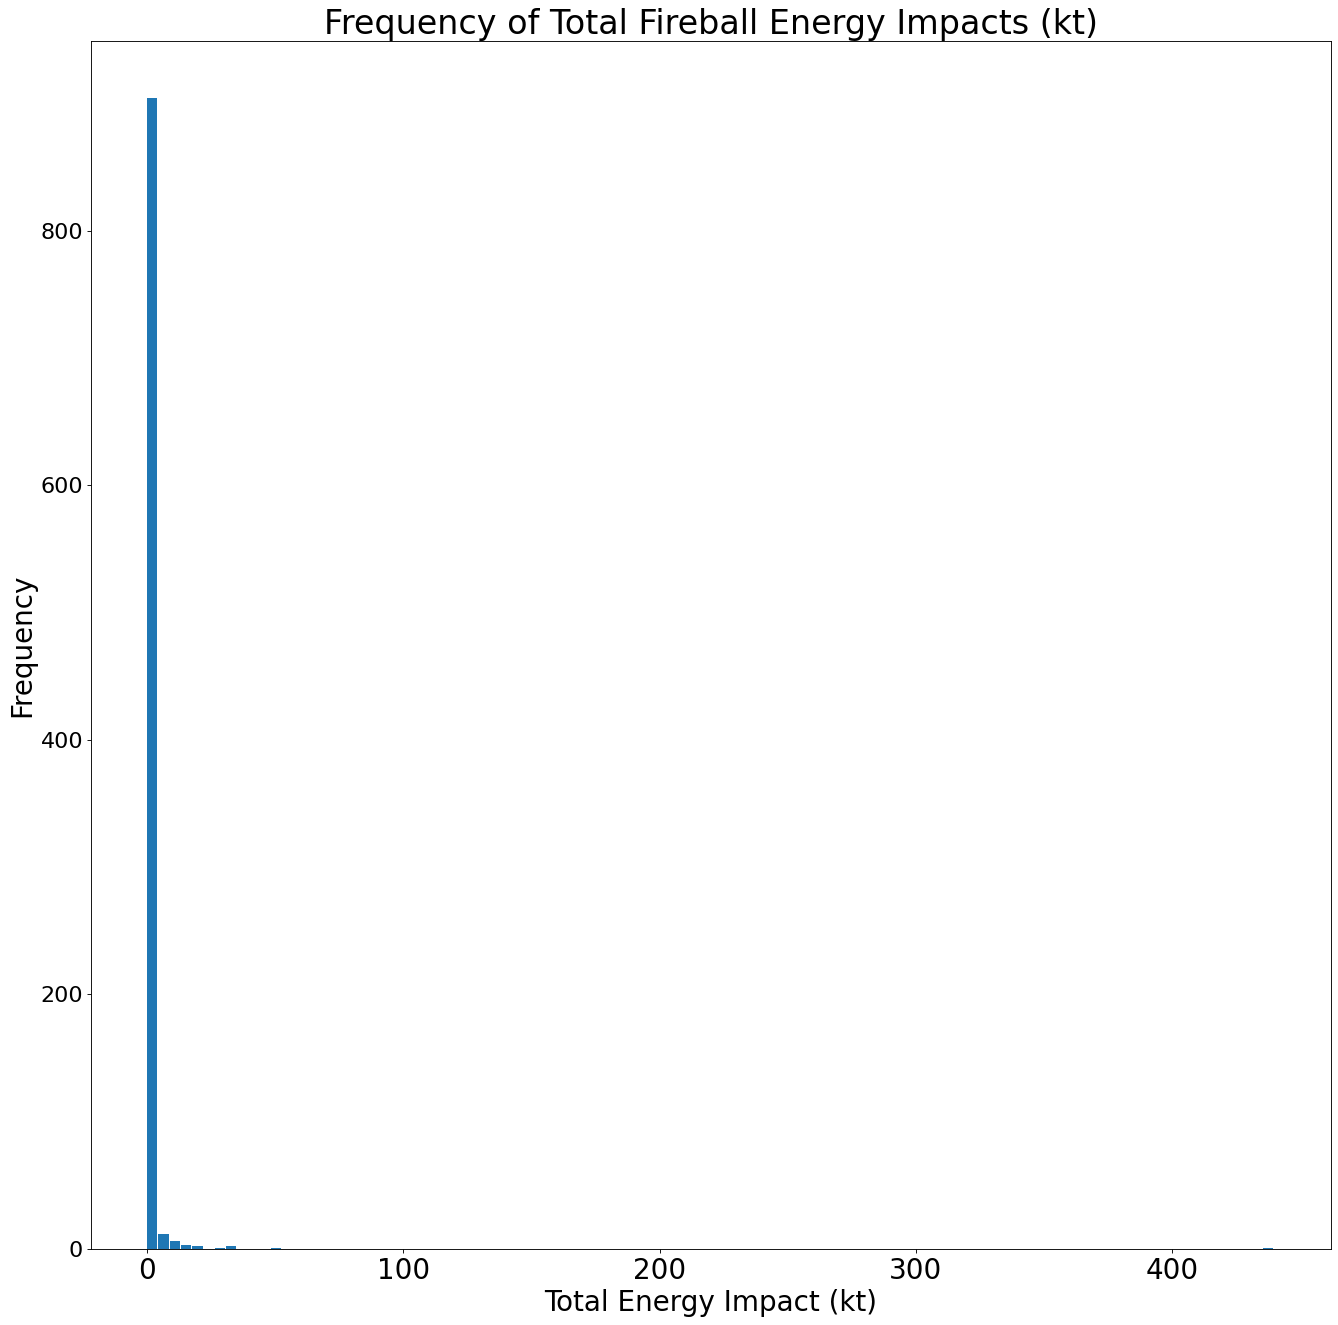

In [26]:
from matplotlib.pyplot import figure
figure(figsize=(20, 20), dpi=80)
plt.hist(rock["Calculated Total Impact Energy (kt)"], bins=100, width=4)
plt.xlabel("Total Energy Impact (kt)", size=25)
plt.ylabel("Frequency", size=25)
plt.title("Frequency of Total Fireball Energy Impacts (kt)", fontsize=30)
plt.rcParams['font.size'] = '20'
plt.xticks(fontsize=25)

In [32]:
print(statistics.median(rock["Calculated Total Impact Energy (kt)"]),min(rock["Calculated Total Impact Energy (kt)"]),max(rock["Calculated Total Impact Energy (kt)"]), statistics.stdev(rock["Calculated Total Impact Energy (kt)"]),statistics.mean(rock["Calculated Total Impact Energy (kt)"]))

0.2 0.073 440.0 14.675072216213934 1.230736051502146


In [66]:
outs = []
for i in rock["Calculated Total Impact Energy (kt)"]:
    if i>=statistics.mean(rock["Calculated Total Impact Energy (kt)"])+3*statistics.stdev(rock["Calculated Total Impact Energy (kt)"]):
        outs.append(i)
        
outs

[49.0, 440.0]

In [59]:
bog=rock["Calculated Total Impact Energy (kt)"]

lop = []

for i in bog:
    if i>(1.5*(np.quantile(bog,0.75)-np.quantile(bog,0.25))+np.quantile(bog,0.75)) or i<(-1.5*(np.quantile(bog,0.75)-np.quantile(bog,0.25))+np.quantile(bog,0.25)):
        lop.append(i)

print(len(lop))

111


In [65]:
from scipy import stats
import numpy as np

z_scores = stats.zscore(rock["Calculated Total Impact Energy (kt)"])

x=0
for i in z_scores:
    if np.abs(i) >=3:
        x+=1
print(x)

2


In [35]:
2/len(rock["Calculated Total Impact Energy (kt)"])

0.002145922746781116

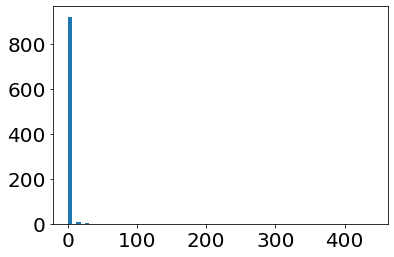

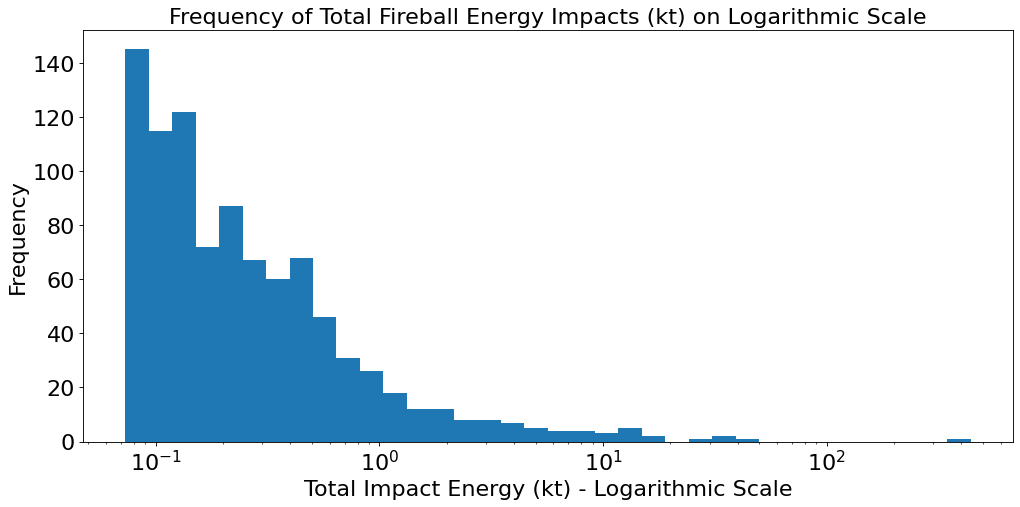

In [71]:
hist, bins, _ = plt.hist(rock["Calculated Total Impact Energy (kt)"], bins=36, width=6)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
figure(figsize=(15, 15), dpi=80)
plt.subplot(212)
plt.hist(rock["Calculated Total Impact Energy (kt)"], bins=logbins)
plt.xscale('log')
plt.xticks(fontsize=20)
plt.xlabel("Total Impact Energy (kt) - Logarithmic Scale", size=20)
plt.ylabel("Frequency", size=20)
plt.title("Frequency of Total Fireball Energy Impacts (kt) on Logarithmic Scale", fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [39]:
logs = []
for i in rock["Calculated Total Impact Energy (kt)"]:
    logs.append(np.log10(i))
logs

[-1.0222763947111522,
 -0.958607314841775,
 -1.0655015487564323,
 -1.1191864077192086,
 0.07918124604762482,
 -0.16749108729376366,
 0.11394335230683679,
 -0.5686362358410126,
 -0.721246399047171,
 -0.5686362358410126,
 -1.0222763947111522,
 0.25527250510330607,
 -0.5528419686577808,
 -0.6777807052660807,
 -0.5528419686577808,
 -0.958607314841775,
 -0.431798275933005,
 -0.8860566476931632,
 -0.769551078621726,
 -1.0222763947111522,
 -1.136677139879544,
 -0.00877392430750515,
 -0.619788758288394,
 0.6020599913279624,
 -1.136677139879544,
 -1.1191864077192086,
 -1.0222763947111522,
 -0.6777807052660807,
 0.8450980400142568,
 -0.3565473235138126,
 -0.744727494896694,
 -0.045757490560675115,
 0.4623979978989561,
 -0.37675070960209955,
 -1.136677139879544,
 -1.1191864077192086,
 -0.958607314841775,
 -0.7958800173440752,
 -0.8860566476931632,
 -1.0655015487564323,
 -0.958607314841775,
 -1.0,
 -0.8860566476931632,
 -0.721246399047171,
 -1.136677139879544,
 -0.3979400086720376,
 -0.95860731484

In [37]:
a=rock["Calculated Total Impact Energy (kt)"][0]
np.log(a,10)

TypeError: return arrays must be of ArrayType

In [41]:
10**logs.max()

AttributeError: 'list' object has no attribute 'max'

In [42]:
print(min(logs), max(logs), statistics.median(logs), statistics.mean(logs), statistics.stdev(logs))

-1.136677139879544 2.6434526764861874 -0.6989700043360187 -0.5899603245373916 0.49311199212428214


In [68]:
for i in logs:
    if i>statistics.mean(logs)+3*statistics.stdev(logs) or i<statistics.mean(logs)-3*statistics.stdev(logs):
        print(i)

0.9777236052888477
1.6901960800285136
1.1139433523068367
1.0
2.6434526764861874
1.5185139398778875
1.146128035678238
1.255272505103306
1.5185139398778875
1.146128035678238
1.255272505103306
1.1139433523068367
0.9444826721501687
0.9542425094393249
0.9912260756924949
1.4771212547196624
1.146128035678238


In [48]:
np.quantile(logs,0.75)

-0.37675070960209955

In [90]:
lap

[97.6,
 63.4,
 165.9,
 51.5,
 78.4,
 86.9,
 2.9,
 76.6,
 20.5,
 59.6,
 130.1,
 175.0,
 12.9,
 164.7,
 39.1,
 127.1,
 30.4,
 68.9,
 57.8,
 64.3,
 171.4,
 74.3,
 20.6,
 9.1,
 99.5,
 45.9,
 38.9,
 56.4,
 11.4,
 142.2,
 38.0,
 73.9,
 160.2,
 152.6,
 115.0,
 29.6,
 60.3,
 172.6,
 113.5,
 119.1,
 7.7,
 138.7,
 51.4,
 140.4,
 154.3,
 148.0,
 111.8,
 90.1,
 98.4,
 nan,
 164.2,
 55.3,
 171.2,
 141.0,
 43.4,
 79.1,
 106.7,
 90.4,
 141.1,
 64.1,
 92.8,
 80.1,
 115.2,
 51.3,
 47.6,
 95.5,
 158.2,
 54.7,
 96.2,
 135.1,
 81.0,
 16.8,
 160.4,
 71.9,
 133.5,
 150.2,
 93.9,
 93.9,
 135.8,
 169.7,
 133.5,
 34.2,
 103.8,
 11.2,
 74.0,
 41.7,
 77.2,
 174.2,
 44.2,
 131.0,
 109.4,
 49.8,
 45.6,
 23.5,
 67.9,
 nan,
 90.8,
 15.1,
 96.0,
 76.7,
 1.5,
 35.8,
 34.3,
 66.0,
 116.4,
 125.2,
 17.5,
 147.6,
 161.7,
 37.7,
 52.2,
 31.7,
 nan,
 25.7,
 143.3,
 76.0,
 122.9,
 107.2,
 28.4,
 33.5,
 126.9,
 9.2,
 47.8,
 130.4,
 92.9,
 7.0,
 147.6,
 129.5,
 168.7,
 66.2,
 67.6,
 25.3,
 89.4,
 37.3,
 137.5,
 132.8,
 57.1,


In [80]:
lap = []
for i in long:
    lap.append(float(str(i[:-1])))

TypeError: 'float' object is not subscriptable

In [54]:
lag

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [57]:
if long[0][-1]=="E":
    lag.append("-"+long[0][:-1])

In [82]:
int(str(long[0][:-1]))

ValueError: invalid literal for int() with base 10: '97.'